# Prediction of car prices
#### Goal of the assignment:
To model the price of cars with the available independent variables to be used by the management to understand how exactly the prices vary with the independent variables. The company, Geely Auto can then decide of the fetures that best explain the variation in the price. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 
#### Import the required libraries

In [286]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

#### Read the data and perform EDA

In [287]:
df=pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [293]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Columns names
Drop Car_Id as it is not required for computation

### Retain company name, remove the rest of the detail in the  column "CarName"

In [288]:
df["CarName"]=df["CarName"].str.split(" ",n=1, expand=True)
df.head

<bound method NDFrame.head of      car_ID  symboling      CarName fueltype aspiration doornumber  \
0         1          3  alfa-romero      gas        std        two   
1         2          3  alfa-romero      gas        std        two   
2         3          1  alfa-romero      gas        std        two   
3         4          2         audi      gas        std       four   
4         5          2         audi      gas        std       four   
5         6          2         audi      gas        std        two   
6         7          1         audi      gas        std       four   
7         8          1         audi      gas        std       four   
8         9          1         audi      gas      turbo       four   
9        10          0         audi      gas      turbo        two   
10       11          2          bmw      gas        std        two   
11       12          0          bmw      gas        std       four   
12       13          0          bmw      gas        std     

In [299]:
df["CarName"].loc[(df["CarName"]=='vw')|(df["CarName"]=='vokswagen')|(df["CarName"]=='volkswagen')]='volkswagen'
df["CarName"].loc[(df["CarName"]=='nissan')|(df["CarName"]=='Nissan')]='nissan'
df["CarName"].loc[(df["CarName"]=='porcshce')|(df["CarName"]=='porsche')]='porsche' 
df["CarName"].loc[(df["CarName"]=='toyouta')|(df["CarName"]=='toyota')]='toyota'
df["CarName"].loc[(df["CarName"]=='mazda')|(df["CarName"]=='maxda')]='mazda'

# Checking shape and data types

In [300]:
print(df.shape)
print(df.dtypes)

(205, 26)
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


# Five point Summary of the data

In [301]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Checking for null Values: no null values found

In [302]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Checking for NaN values : No NaN found

In [303]:
df.isna().sum().head()

car_ID        0
symboling     0
CarName       0
fueltype      0
aspiration    0
dtype: int64

# Checking the R - Values

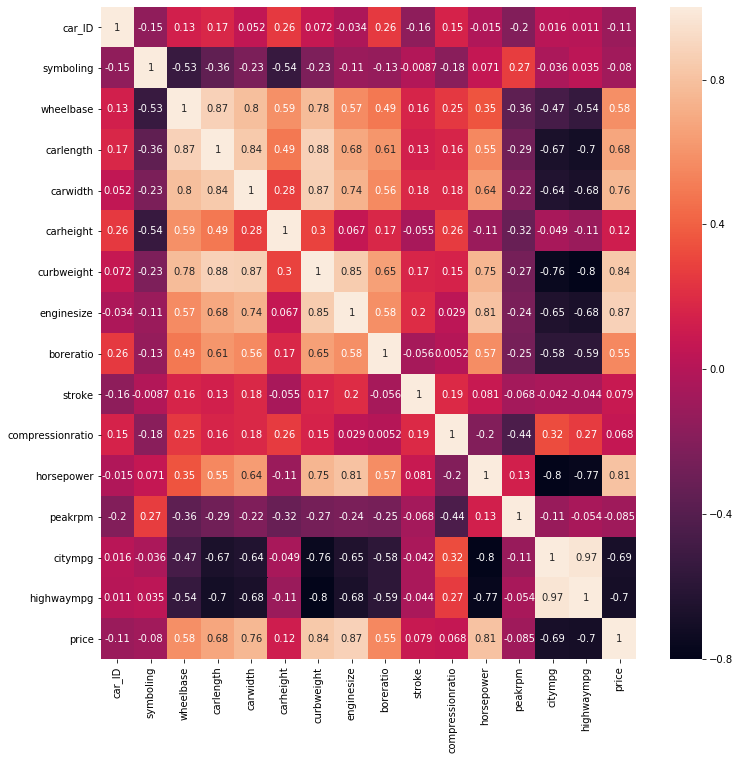

In [304]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

# Dataframe for continuous variables (float and integers)

In [305]:
df_conti=df.filter([ 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'boreratio', 'stroke',
'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','enginesize','price'])

df_conti.head()



,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,enginesize,price
0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,130,13495.0
1,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,130,16500.0
2,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,152,16500.0
3,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,109,13950.0
4,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,136,17450.0


# Scatter Plot to checkout the variation and multicollinearity 

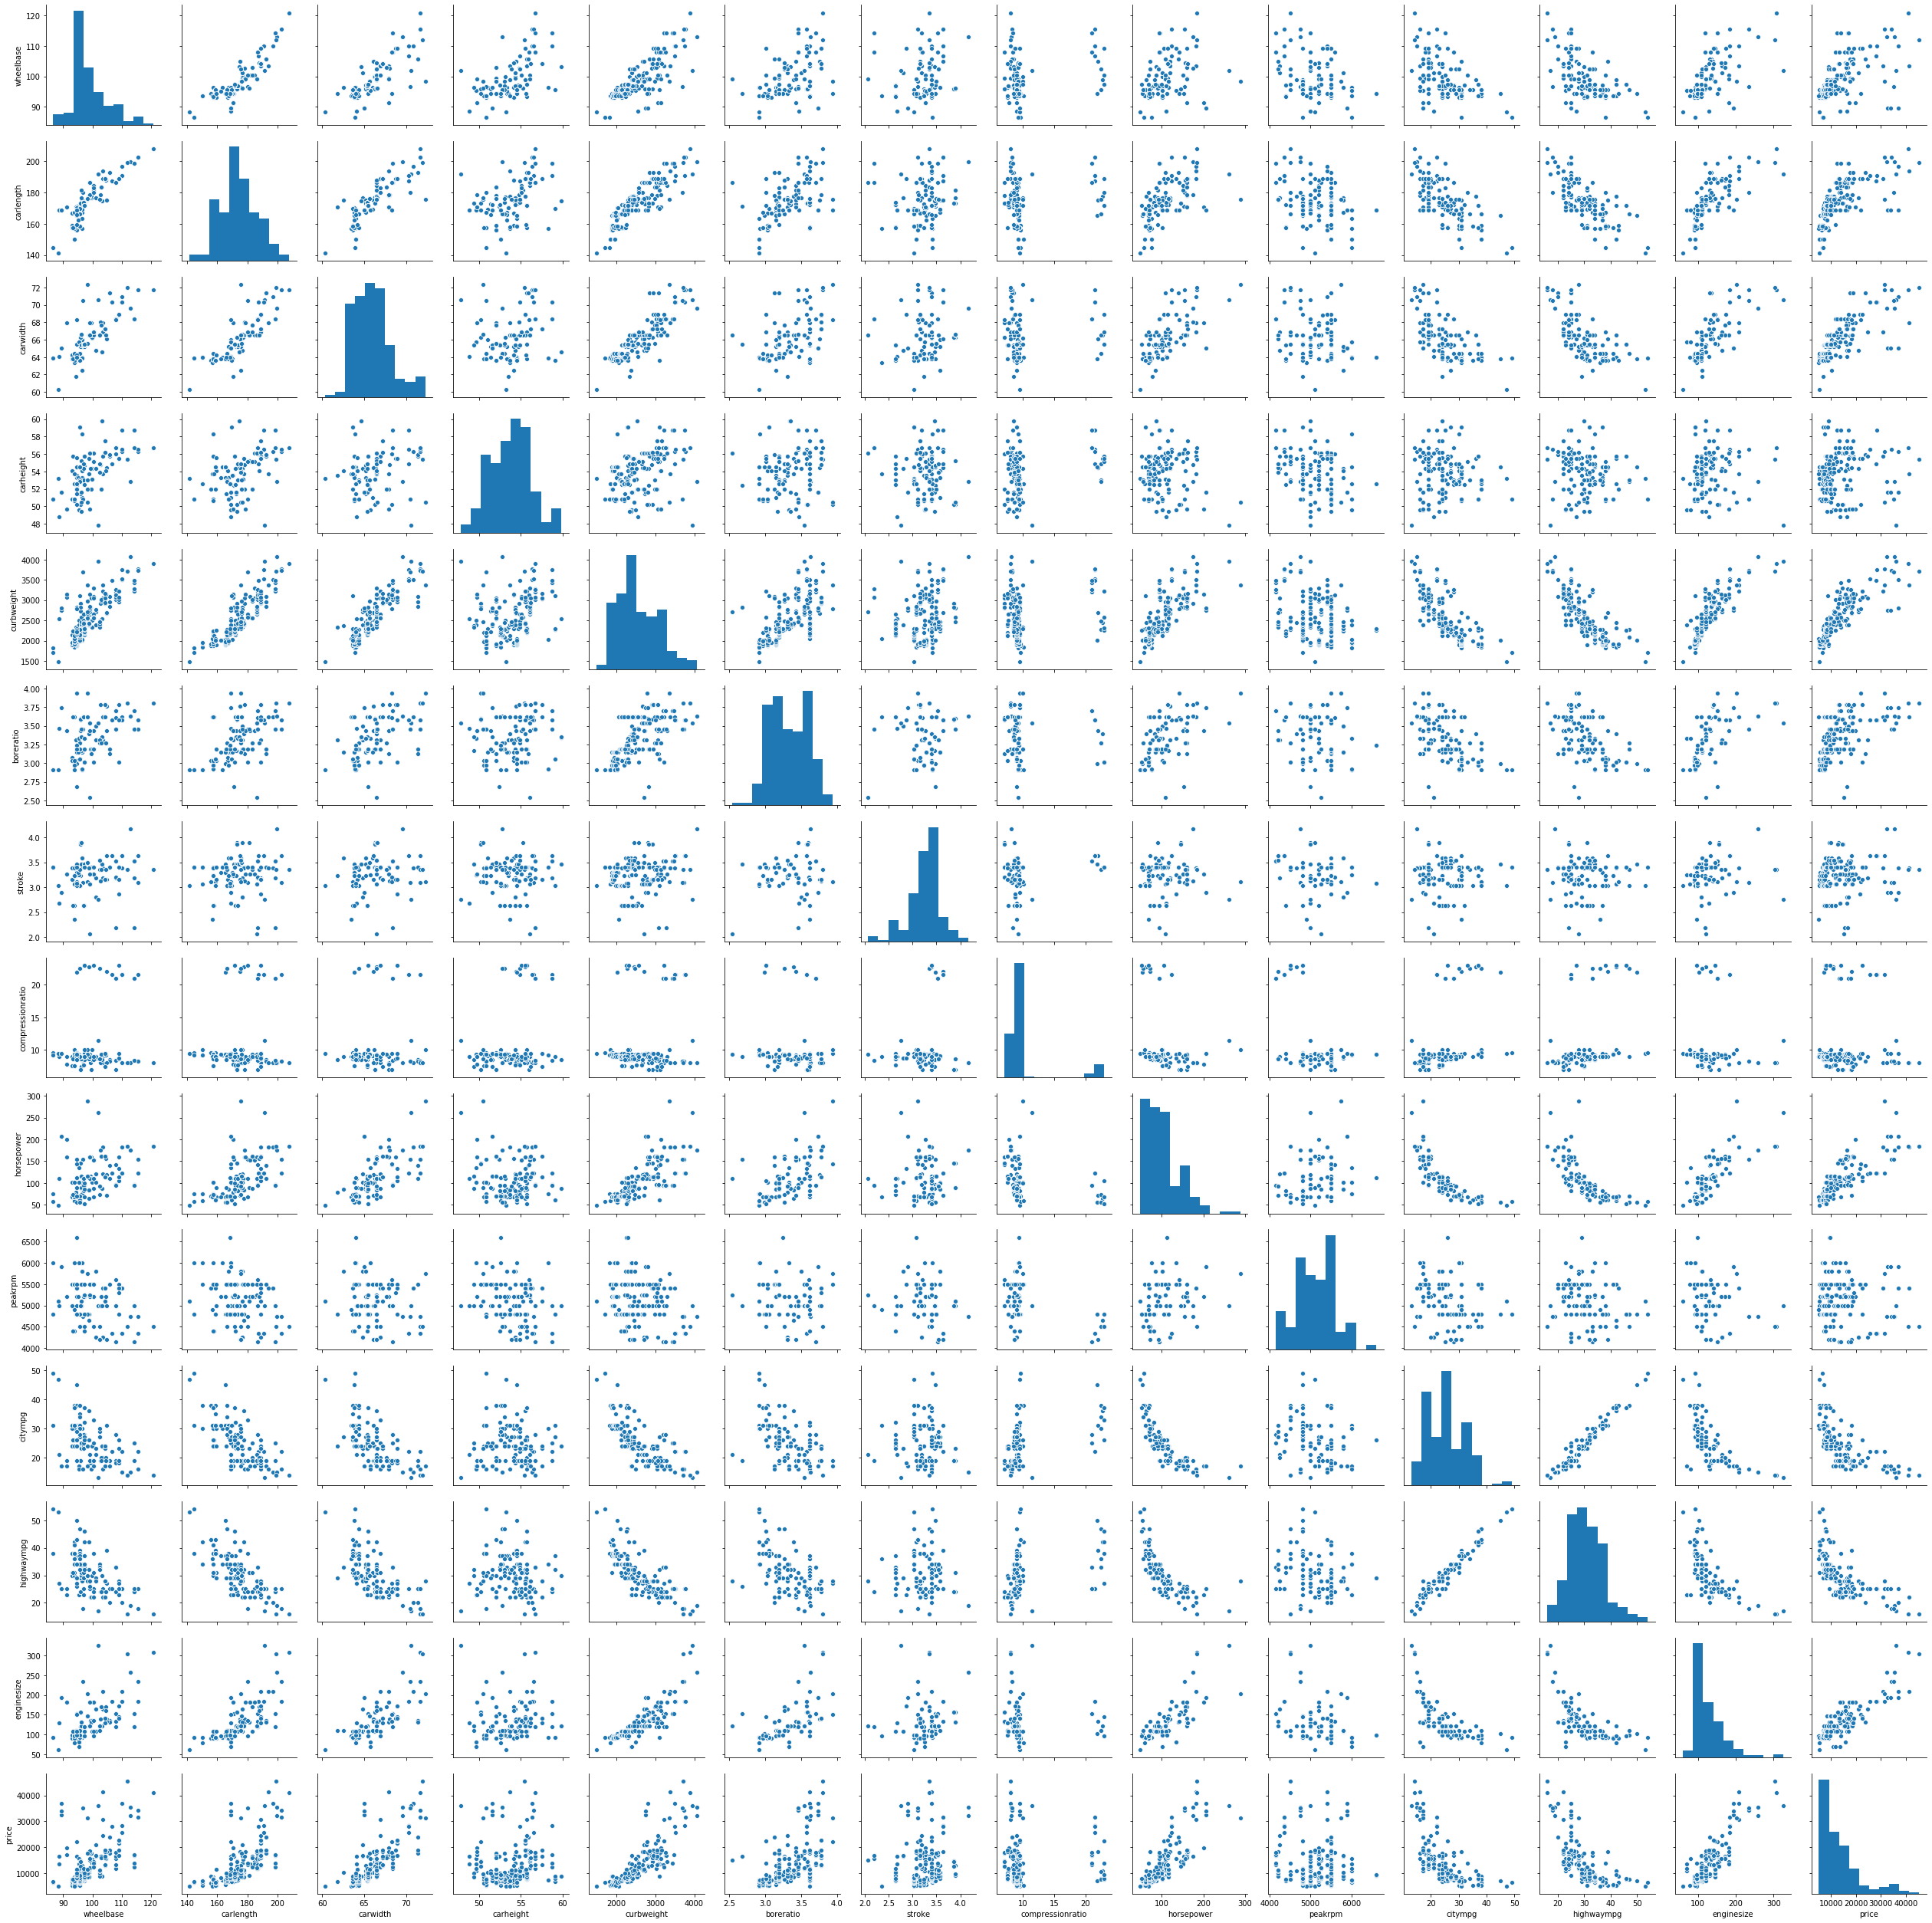

In [306]:
sns.pairplot(df_conti)

### Observations from the correlation coefficent 
There seems to be a high positive correlation between the following
>highwaympg and citympg
>carlength and curb weight 
>wheelbase : curbweight,carwidth,carlength
>curbweight : horsepower
>horsepower : enginesize

## multicollinearity a few observations
>highway millage and city millage seem to correlated
>compression ratio does not exhibit collinearity with any other variables

# Dataframe for the categorical variables 

In [307]:
df_cate=df.filter([ "symboling",'CarName', 'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber',  'fuelsystem','price'])
df_cate.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


### Visualizations for categorical variables to study the center, spead and variation

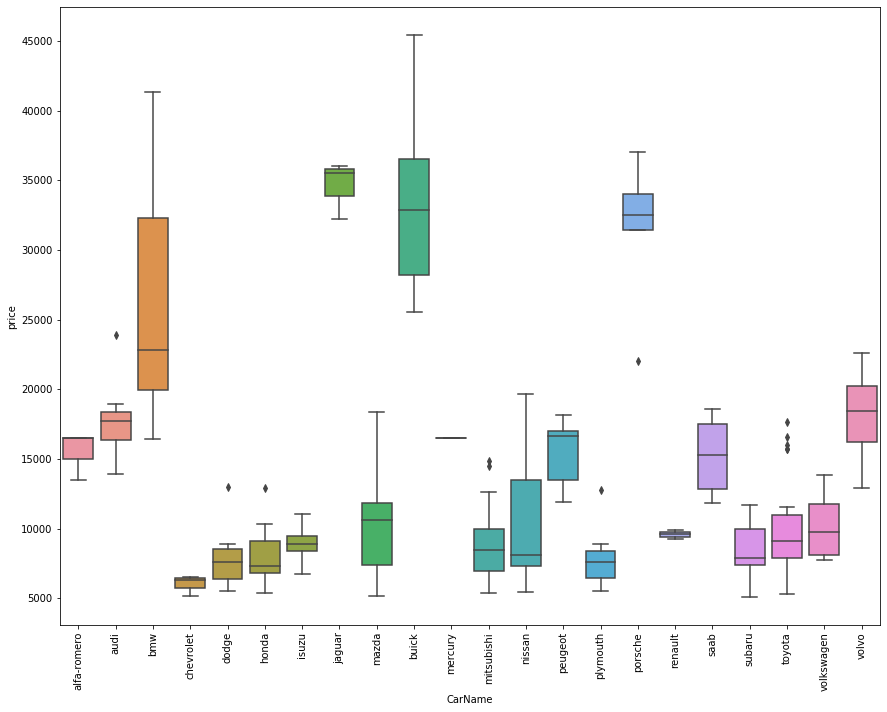

In [308]:
plt.figure(figsize=(50,25))
plt.subplot(2,3,1)
plt.xticks(rotation = 90)
sns.boxplot(x="CarName",y="price",data=df)


## Observations
> all but 4 models seem to be low-end cars
> bmw,buick, porsche fall in higher pricerange
> Nissan conver a wider price range giving a larger customer base to the company

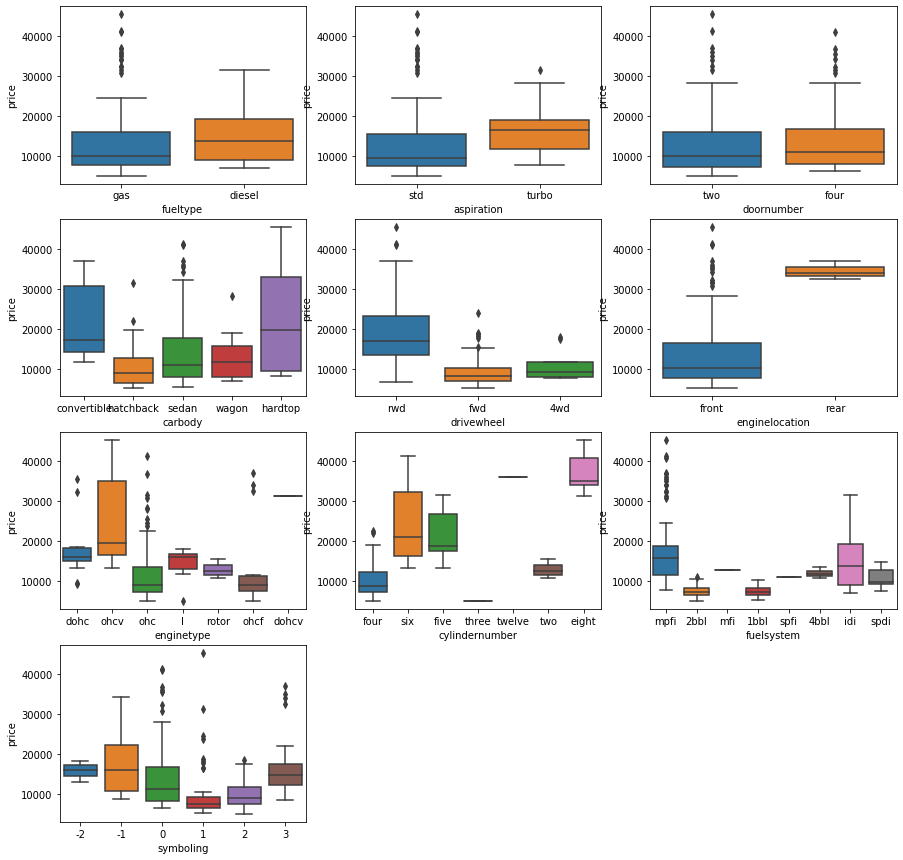

In [309]:
plt.figure(figsize=(15,15))

plt.subplot(4,3,1)
sns.boxplot(x="fueltype",y="price",data=df)

plt.subplot(4,3,2)
sns.boxplot(x="aspiration",y="price",data=df)

plt.subplot(4,3,3)
sns.boxplot(x="doornumber",y="price",data=df)

plt.subplot(4,3,4)
sns.boxplot(x="carbody",y="price",data=df)

plt.subplot(4,3,5)
sns.boxplot(x="drivewheel",y="price",data=df)

plt.subplot(4,3,6)
sns.boxplot(x="enginelocation",y="price",data=df)

plt.subplot(4,3,7)
sns.boxplot(x="enginetype",y="price",data=df)

plt.subplot(4,3,8)
sns.boxplot(x="cylindernumber",y="price",data=df)

plt.subplot(4,3,9)
sns.boxplot(x="fuelsystem",y="price",data=df)
plt.subplot(4,3,10)
sns.boxplot(x="symboling",y="price",data=df)

## Categorical Variables continued..
Cars that run on gas offer more options  and so do cars with standard or natural aspiration aspiration, ( auto transmition cars)
2. 4 and 2 door sedans are comparable 
3. i'd pick hardtop and convertibles, the sedan again covers wider price range
4. rear wheel drive and front engine appear to be a good investment
5. Engine type : ohcv with 6 cylinders and the multi point fuesl injection system for the fuel system would be great features to attact wider customer base

#  Creating dummy variables for categorical variables and cancatente the df to the original df

In [310]:
df_cate=df.filter([ "symboling",'CarName', 'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber',  'fuelsystem'])

In [311]:
def dummy_conv(data):
    return pd.get_dummies(data,drop_first=True)    
dum_vars=dummy_conv(df_cate)


In [312]:
Dum_df=pd.concat([df,dum_vars],axis=1)
Dum_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,1,0,0


In [313]:
print(pd.get_dummies(df["car_ID"]))

     1    2    3    4    5    6    7    8    9    10   ...  196  197  198  \
0      1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1      0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
2      0    0    1    0    0    0    0    0    0    0  ...    0    0    0   
3      0    0    0    1    0    0    0    0    0    0  ...    0    0    0   
4      0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
5      0    0    0    0    0    1    0    0    0    0  ...    0    0    0   
6      0    0    0    0    0    0    1    0    0    0  ...    0    0    0   
7      0    0    0    0    0    0    0    1    0    0  ...    0    0    0   
8      0    0    0    0    0    0    0    0    1    0  ...    0    0    0   
9      0    0    0    0    0    0    0    0    0    1  ...    0    0    0   
10     0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
11     0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

In [314]:
### drop the original variable

In [315]:
Dum_df=Dum_df.drop(["car_ID","symboling",'CarName', 'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber',  'fuelsystem'],axis=1)


In [316]:
Dum_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [317]:
Dum_df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_porsche',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_f

# Splitting the Data into Training and Testing Sets¶
 As you know, the first basic step for regression is performing a train-test split.

In [318]:
import sklearn
from sklearn.model_selection import train_test_split

In [319]:
np.random.seed(0)
Dum_df_train, Dum_df_test = train_test_split(Dum_df, train_size=0.7,test_size=0.3,random_state=100)
Dum_df_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_porsche',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_f

### We will apply MinMax scaling to continuous variables to make the R values comparable 

In [320]:
from sklearn.preprocessing import MinMaxScaler

In [321]:
scaler=MinMaxScaler()

### We already have a DF with just the continuous variables let's use that to get our list 

In [322]:
Vars=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'enginesize','price']

In [323]:
Dum_df_train[Vars]=scaler.fit_transform(Dum_df_train[Vars])

In [324]:
Dum_df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


### Lets now check the correlation coefficients after moving price to the front for ease of reading


In [325]:
Dum_df_train_1=Dum_df_train[Dum_df_train.columns[13:]]

In [326]:
Dum_df_train_2=Dum_df_train[Dum_df_train.columns[:13]]

In [327]:
Dum_df_train=pd.concat([Dum_df_train_1,Dum_df_train_2],axis=1)

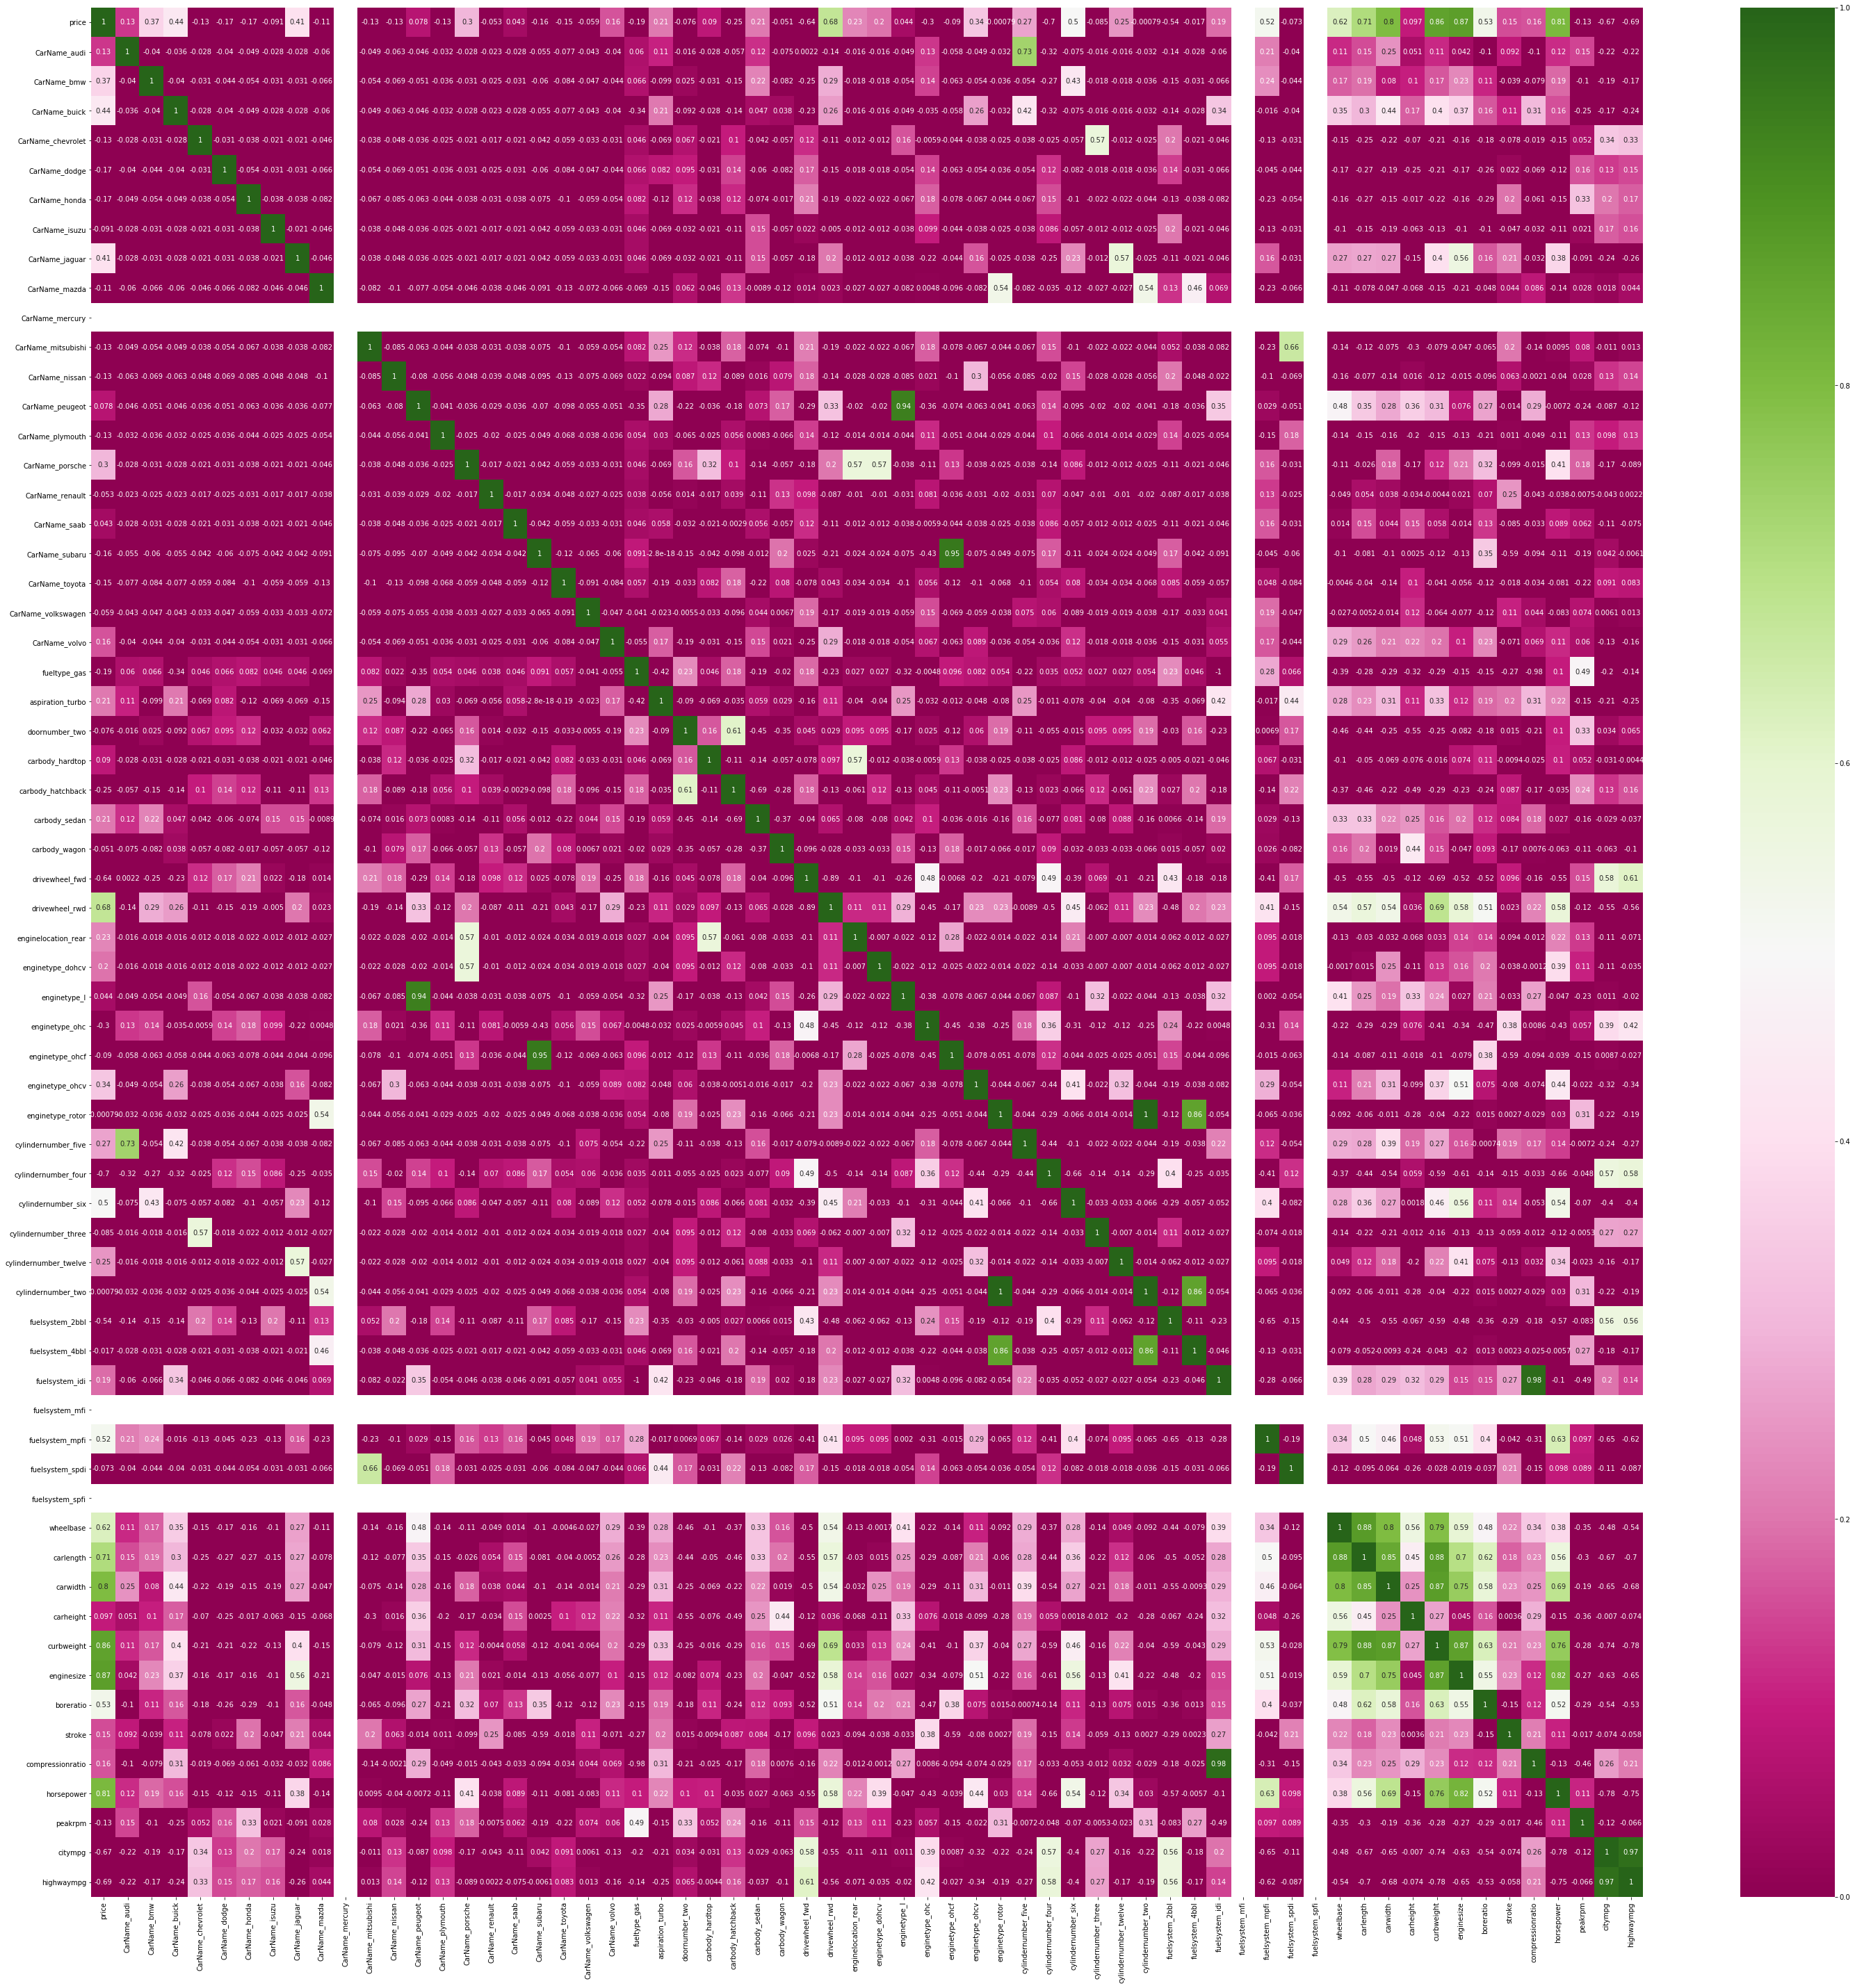

In [328]:
plt.figure(figsize=(50,50))
sns.heatmap(Dum_df_train.corr(),
            vmin=0,annot=True,
            cmap='PiYG')

### I used the vmin argument to highlight the positive correlation
>It is evident that price is positively correlated to horepower, boreratio,curbweight, enginesize 
and a few more variables
> There is a large colinearity(obviously) among the "metics" of the cars, like the carweight, carlength etc as seen in
the botton right part of the above heatmap.

### Let us now make a Linear regression model with the above variables for this we need to download the required libraries


In [329]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [330]:
y_train = Dum_df_train.pop('price')
X_train = Dum_df_train

In [331]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [332]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('CarName_audi', False, 22),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 23),
 ('CarName_chevrolet', False, 8),
 ('CarName_dodge', False, 5),
 ('CarName_honda', False, 7),
 ('CarName_isuzu', False, 36),
 ('CarName_jaguar', False, 12),
 ('CarName_mazda', False, 29),
 ('CarName_mercury', False, 37),
 ('CarName_mitsubishi', True, 1),
 ('CarName_nissan', False, 28),
 ('CarName_peugeot', True, 1),
 ('CarName_plymouth', False, 4),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 25),
 ('CarName_saab', True, 1),
 ('CarName_subaru', True, 1),
 ('CarName_toyota', False, 30),
 ('CarName_volkswagen', False, 31),
 ('CarName_volvo', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', True, 1),
 ('doornumber_two', False, 33),
 ('carbody_hardtop', False, 16),
 ('carbody_hatchback', False, 15),
 ('carbody_sedan', False, 17),
 ('carbody_wagon', False, 18),
 ('drivewheel_fwd', False, 34),
 ('drivewheel_rwd', False, 27),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv'

### Top 25 features selected 

In [333]:
col = X_train.columns[rfe.support_]
col

Index(['CarName_bmw', 'CarName_mitsubishi', 'CarName_peugeot',
       'CarName_porsche', 'CarName_saab', 'CarName_subaru', 'CarName_volvo',
       'aspiration_turbo', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm'],
      dtype='object')

### Features not selectd by the model

In [334]:
X_train.columns[~rfe.support_]

Index(['CarName_audi', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_nissan', 'CarName_plymouth',
       'CarName_renault', 'CarName_toyota', 'CarName_volkswagen',
       'fueltype_gas', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'citympg', 'highwaympg'],
      dtype='object')

### Now let us look at the Stat model for the selected features

In [335]:
#Create a dataframe
X_train_rfe = X_train[col]

In [336]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [337]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [338]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     123.2
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           1.12e-71
Time:                        16:15:19   Log-Likelihood:                 242.95
No. Observations:                 143   AIC:                            -439.9
Df Residuals:                     120   BIC:                            -371.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.31

### I checked the summary stats for 25,20,15 and 10 top variables
1) Top 25 resulted in R-squared values =0.958 and Adjusted R-Square = 0.95 with 2 variables with p-value higher than 0.05
2) Top 15 resulted in R-squared values =0.867 and Adjusted R-Square = 0.852 with 3 variables with p-value higher than
0.05
3) Top 10 resulted in R-squared values =0.809 and Adjusted R-Square = 0.796 with none of the variables with p-value higher than
0.05
I will go with 25 top ranked variables and drop the insignificant ones after checking the VIF


# Calculate the VIFs for the new model
### The Summary says that there might be a high multicollinearity so let us check that out


In [339]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,enginetype_rotor,inf
9,enginelocation_rear,inf
18,cylindernumber_two,inf
3,CarName_peugeot,inf
16,cylindernumber_three,inf
12,enginetype_ohcf,inf
6,CarName_subaru,inf
11,enginetype_l,inf
0,const,107.79
21,enginesize,39.27


#### enginetype_rotor,enginelocation_rear,cylindernumber_two,CarName_peugeot,cylindernumber_three,enginetype_ohcf,CarName_subaru and enginetype_l have VIF as infinity which mean all the variablity that is explained by there variables is also being explained by the rest of the model, hence these variables can be dropped 

### Let's now create a model with the remaining variables

In [340]:
X_train_rfe.columns

Index(['const', 'CarName_bmw', 'CarName_mitsubishi', 'CarName_peugeot',
       'CarName_porsche', 'CarName_saab', 'CarName_subaru', 'CarName_volvo',
       'aspiration_turbo', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm'],
      dtype='object')

In [341]:
X_train_new = X_train_rfe.drop(['enginetype_rotor','stroke','enginetype_ohcf','const','horsepower','enginetype_dohcv',
                               'peakrpm','enginetype_l','CarName_peugeot','curbweight','carwidth','CarName_subaru','enginelocation_rear'
                               ,'boreratio','cylindernumber_four','cylindernumber_three','cylindernumber_twelve','CarName_mitsubishi'],axis=1)

In [342]:
X_train_new.columns

Index(['CarName_bmw', 'CarName_porsche', 'CarName_saab', 'CarName_volvo',
       'aspiration_turbo', 'cylindernumber_five', 'cylindernumber_two',
       'enginesize'],
      dtype='object')

In [343]:
#Lets rebuild the model with the new dataframe

In [344]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)


In [345]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [346]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     142.8
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           1.01e-61
Time:                        16:15:25   Log-Likelihood:                 178.12
No. Observations:                 143   AIC:                            -338.2
Df Residuals:                     134   BIC:                            -311.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0916    

In [347]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,enginesize,1.59
4,aspiration_turbo,1.36
5,cylindernumber_five,1.19
0,CarName_bmw,1.14
3,CarName_volvo,1.11
1,CarName_porsche,1.09
2,CarName_saab,1.03
6,cylindernumber_two,1.00


### With 8 variables explaining 89.5% of the variation in the price and the adjusted R-Squared being 88.9% plus the F-Values = 142.8 with a probability lower than the level of significane (0.05) we seem to have a well trained model. 

### This will give the Geely Auto a wider range of varibles to work with, I think it was a good idea to start with higher number of variables, looks like they will have high-end car dealership :)

In [348]:
X_train_new.columns

Index(['CarName_bmw', 'CarName_porsche', 'CarName_saab', 'CarName_volvo',
       'aspiration_turbo', 'cylindernumber_five', 'cylindernumber_two',
       'enginesize'],
      dtype='object')

### Residual Analysis : Let's do the residual analysis to see how the error terms are distributed


In [349]:
X_train_lm = sm.add_constant(X_train_new)

In [372]:
y_train_pred = lm.predict(X_train_lm)

In [351]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

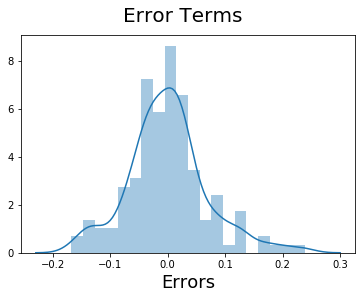

In [373]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [353]:
### The residuals are centere at 0 and are normally distributed, which meas that the linear Regression is a good fit.

# Making Predictions by testing our model on the test data

In [354]:
Vars=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'enginesize','price']

In [355]:
Dum_df_test[Vars] = scaler.transform(Dum_df_test[Vars])

### Divide in to X_test and y_test

In [356]:
y_test = Dum_df_test.pop('price')
X_test = Dum_df_test

In [357]:
X_train_new.columns

Index(['CarName_bmw', 'CarName_porsche', 'CarName_saab', 'CarName_volvo',
       'aspiration_turbo', 'cylindernumber_five', 'cylindernumber_two',
       'enginesize'],
      dtype='object')

### Use the model to make predictions.

In [358]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [369]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [370]:
import statsmodels

Text(0, 0.5, 'y_pred')

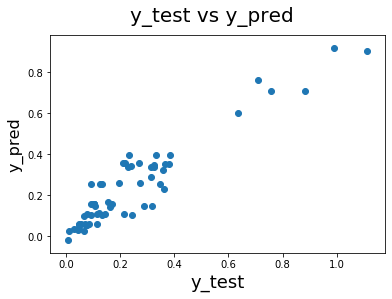

In [371]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Checking the spread of the Residuals Vs y_pred as the assumption is that the spread should be random.

In [374]:
Residual = (y_train - y_train_pred)

Text(0.5, 0, 'y_pred')

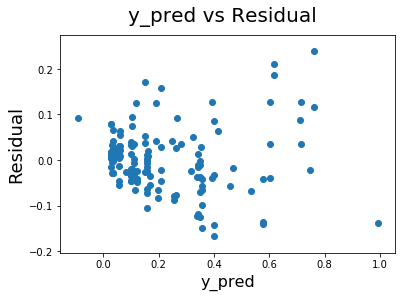

In [379]:
fig = plt.figure()
plt.scatter(y_train_pred,Residual )
fig.suptitle('y_pred vs Residual', fontsize=20)              # Plot heading 
plt.ylabel('Residual', fontsize=18)                          # X-label
plt.xlabel('y_pred', fontsize=16)    



### The residuals are clustered for lower predicted values and more spreadout toward the higher values indicating that a linear model is not a good fit and that there is heteroscedacity.

In [364]:
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred),3)

0.882

## EQUATION of the LR
 ## y=0.23(CareName_bmw)+0.26(CarName_porcsche)+0.11(CarName_Volvo)+0.10(aspitation_turbo)+0.14(cylindernumber_five)+0.26(cylindernumber_two)+1.08(enginesize)-0.091

# Interpreting the results
> The R-Square value of 88.2% for the test data given the train value of 89.5% and adjust r-squared of 88.9% means that the variables explain the price variation pretty well.
> Cars with twin-engine and 5 engines made it to the list, Alfa Romeo , Mazda, Toyota, Suzuki, BMW and VW have models that have the twin-engine while Audi and volvo have models that run on 5 engines, so the company has a pretty wide range of cars they could plan on potentially selling
> 50% The features featured in the final model were also in my initial list that  i made after a through research of the variables I worked with in this assignment, using research based information to develop an intution defnitley helps in picking the right features, after all a human brain is what will be at work at the end of the day!
